### Investigation of Cancellations at Sonnet Insurance

#### Data

In [98]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
sonnet = pd.read_csv('donna-cancellations.csv')

# Explore the data
sonnet.head()

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020
2,500107069,PersonalAutoLine,Other,insured,5/1/2020
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020


In [346]:
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [265]:
sonnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113794 entries, 0 to 113793
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ppd_policy_number          113794 non-null  int64 
 1   ppd_policy_line_type       113794 non-null  object
 2   pj_cancellation_reason     113794 non-null  object
 3   pj_cancellation_source     113794 non-null  object
 4   ppd_cancelled_date_string  113794 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


#### Visualization


In [101]:
sonnet['pj_cancellation_reason'].unique()

array(['MovingOrMoved', 'highPremium', 'Other',
       'renewalCancellationDueToPriorTermCancel_ECO', 'totalLoss_ECO',
       'flatCancellation_ECO', 'soldauto', 'uwreasons',
       'dissatisfiedService', 'nonpayment', 'movinginternal:oop',
       'finalNonPayment_ECO', 'betterCoverageElsewhere_ECO',
       'VoidSpecialReason', 'nondisclose', 'flatrewrite',
       'preferNotToSay', 'midtermrewrite', 'noValidLicense_ECO'],
      dtype=object)

In [102]:
sonnet.head()

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020
2,500107069,PersonalAutoLine,Other,insured,5/1/2020
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020


In [103]:
sonnet[sonnet['pj_cancellation_source'] == 'carrier']['pj_cancellation_reason'].unique()

array(['uwreasons', 'nonpayment', 'Other', 'finalNonPayment_ECO',
       'renewalCancellationDueToPriorTermCancel_ECO', 'VoidSpecialReason',
       'nondisclose', 'flatrewrite', 'midtermrewrite',
       'noValidLicense_ECO'], dtype=object)

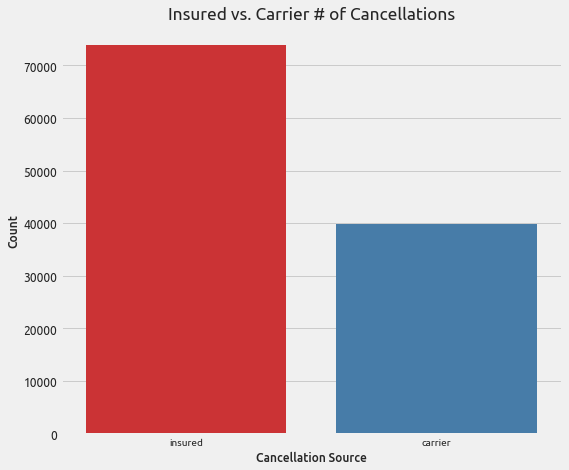

In [344]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(data=sonnet, x='pj_cancellation_source', palette='Set1')
ax.set_title('Insured vs. Carrier # of Cancellations')
ax.set_ylabel('Count');
ax.set_xlabel('Cancellation Source')
sns.set_context('talk')

In [105]:
sonnet[sonnet['pj_cancellation_source'] == 'insured']['pj_cancellation_reason'].unique()

array(['MovingOrMoved', 'highPremium', 'Other',
       'renewalCancellationDueToPriorTermCancel_ECO', 'totalLoss_ECO',
       'flatCancellation_ECO', 'soldauto', 'dissatisfiedService',
       'movinginternal:oop', 'betterCoverageElsewhere_ECO',
       'preferNotToSay'], dtype=object)

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


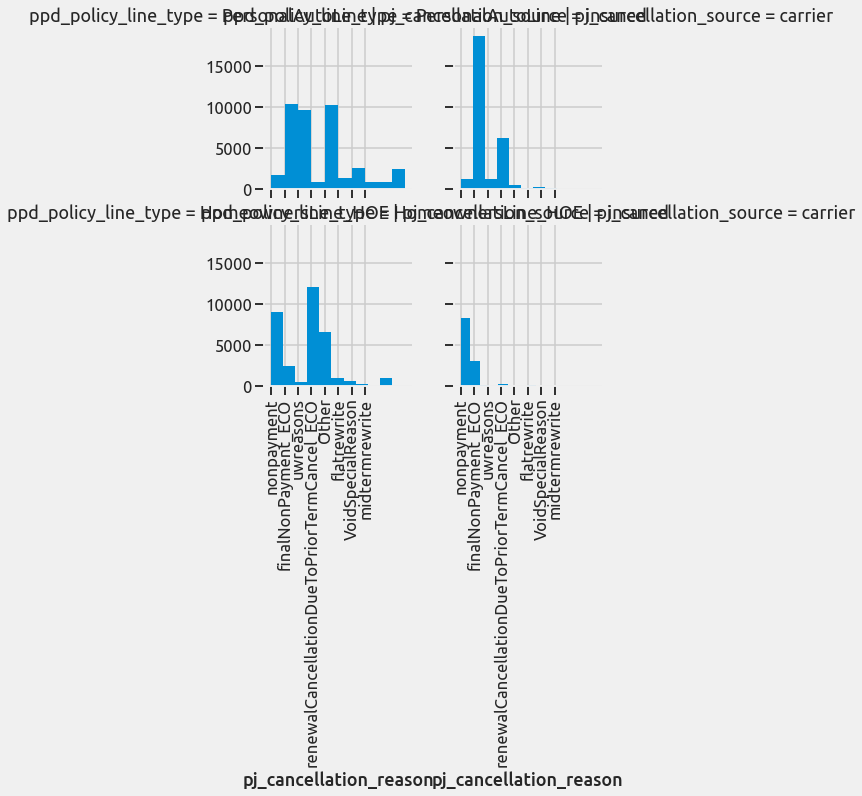

In [260]:
g = sns.FacetGrid(sonnet, col="pj_cancellation_source", row='ppd_policy_line_type')
g = g.map(plt.hist, "pj_cancellation_reason");
g.set_xticklabels(rotation=90)

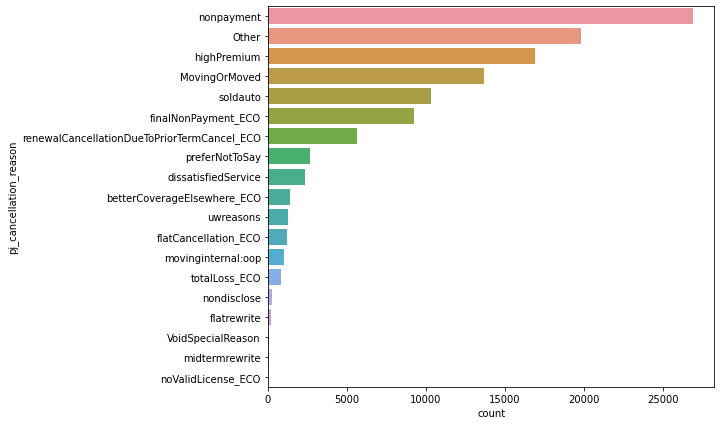

In [83]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="pj_cancellation_reason", data=sonnet, order = sonnet['pj_cancellation_reason'].value_counts().index)

### Divide Data between cancellation sources

In [107]:
sonnet_insured = sonnet[sonnet['pj_cancellation_source'] == 'insured']

In [108]:
sonnet_carrier = sonnet[sonnet['pj_cancellation_source'] == 'carrier']

In [109]:
sonnet['pj_cancellation_source'].unique()

array(['insured', 'carrier'], dtype=object)

### Cancellation Reasons by Source

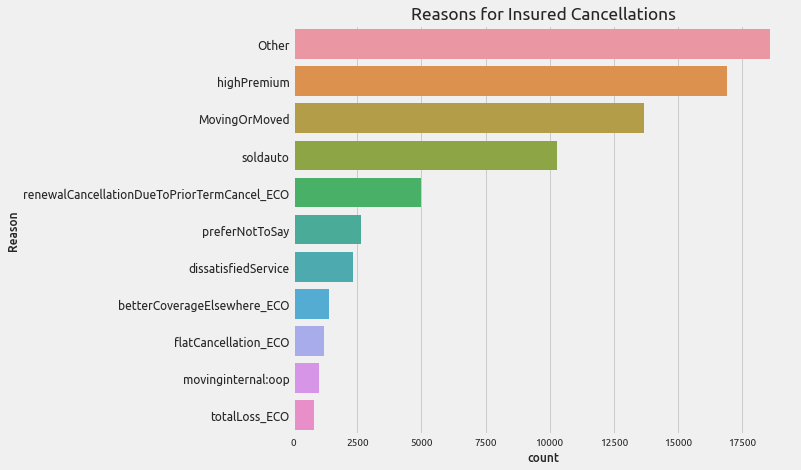

In [347]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="pj_cancellation_reason", data=sonnet_insured, order = \
                   sonnet_insured['pj_cancellation_reason'].value_counts().index)
ax.set_title('Reasons for Insured Cancellations')
ax.set_ylabel('Reason');  
sns.set_context('talk')
#ax.set_xlabel('')


In [361]:
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 12

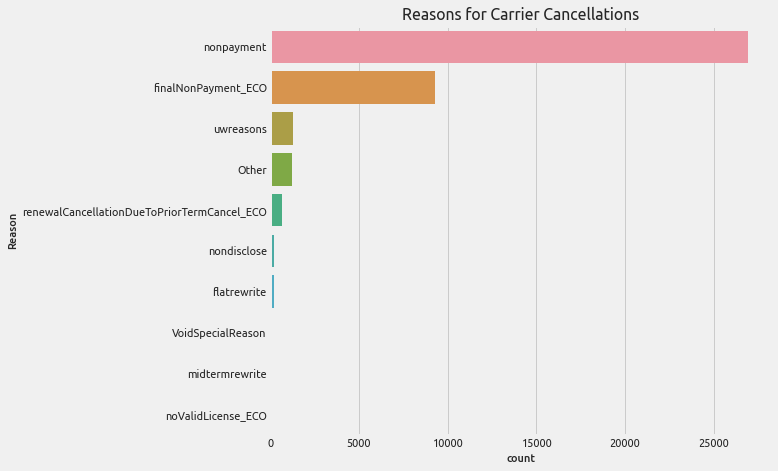

In [349]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="pj_cancellation_reason", data=sonnet_carrier, order = \
                   sonnet_carrier['pj_cancellation_reason'].value_counts().index)
ax.set_title('Reasons for Carrier Cancellations')
ax.set_ylabel('Reason');  
sns.set_context('talk')

In [285]:
sonnet['ppd_policy_line_type'].unique()

array(['PersonalAutoLine', 'HomeownersLine_HOE'], dtype=object)

In [291]:
sonnet_insured_auto = sonnet[(sonnet['ppd_policy_line_type'] == 'PersonalAutoLine') & \
       (sonnet['pj_cancellation_source'] == 'insured')]

In [293]:
sonnet_insured_home = sonnet[(sonnet['ppd_policy_line_type'] == 'HomeownersLine_HOE') & \
       (sonnet['pj_cancellation_source'] == 'insured')]

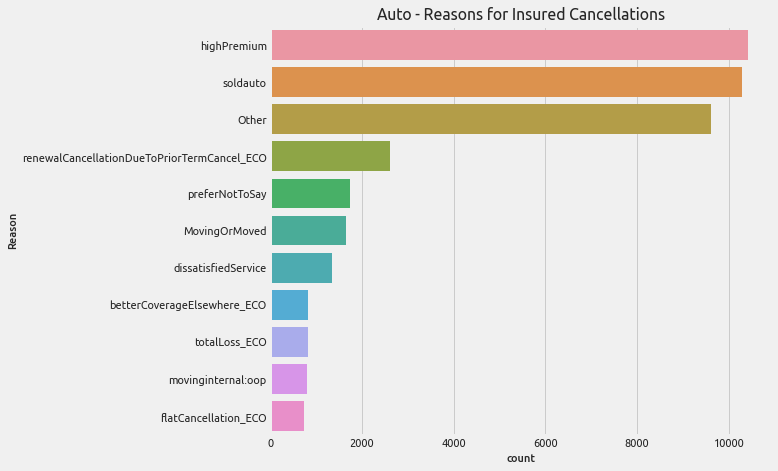

In [352]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="pj_cancellation_reason", data=sonnet_insured_auto, order = \
                   sonnet_insured_auto['pj_cancellation_reason'].value_counts().index)
ax.set_title('Auto - Reasons for Insured Cancellations')
ax.set_ylabel('Reason');  
sns.set_context('talk')
#ax.set_xlabel('')

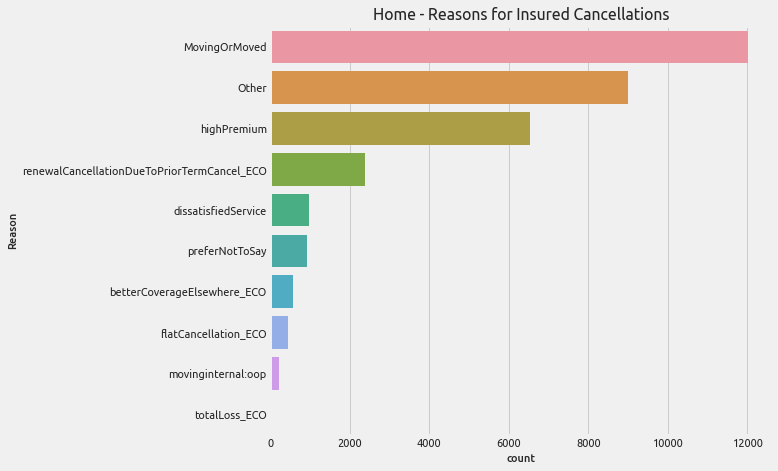

In [354]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(y="pj_cancellation_reason", data=sonnet_insured_home, order = \
                   sonnet_insured_home['pj_cancellation_reason'].value_counts().index)
ax.set_title('Home - Reasons for Insured Cancellations')
ax.set_ylabel('Reason');  
sns.set_context('talk')
#ax.set_xlabel('')

#### Heatmap by Month

In [179]:
sonnet_insured['ppd_cancelled_date_string']

0          5/1/2020
1         6/13/2020
2          5/1/2020
3          5/2/2020
4          5/2/2020
            ...    
113789    1/24/2020
113790    1/23/2020
113791    1/23/2020
113792    1/23/2020
113793    1/24/2020
Name: ppd_cancelled_date_string, Length: 73887, dtype: object

In [183]:
sonnet_insured['date_cancelled'] = pd.to_datetime(sonnet_insured['ppd_cancelled_date_string'].str.strip(), format='%m/%d/%Y')

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
sonnet_insured.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73887 entries, 0 to 113793
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ppd_policy_number          73887 non-null  int64         
 1   ppd_policy_line_type       73887 non-null  object        
 2   pj_cancellation_reason     73887 non-null  object        
 3   pj_cancellation_source     73887 non-null  object        
 4   ppd_cancelled_date_string  73887 non-null  object        
 5   date_cancelled             73887 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 6.4+ MB


In [192]:
sonnet_insured['month'] = pd.DatetimeIndex(sonnet_insured['date_cancelled']).month

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
sonnet_insured

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled,month
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01,5
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13,6
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01,5
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02,5
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020,2020-05-02,5
...,...,...,...,...,...,...,...
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24,1
113790,500099785,HomeownersLine_HOE,Other,insured,1/23/2020,2020-01-23,1
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23,1
113792,500175559,PersonalAutoLine,soldauto,insured,1/23/2020,2020-01-23,1


In [196]:
from datetime import datetime


In [200]:
sonnet_insured['month_name'] = sonnet_insured['date_cancelled'].dt.strftime('%b')



/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [201]:
sonnet_insured

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled,month,month_name
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01,5,May
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13,6,Jun
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01,5,May
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02,5,May
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020,2020-05-02,5,May
...,...,...,...,...,...,...,...,...
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24,1,Jan
113790,500099785,HomeownersLine_HOE,Other,insured,1/23/2020,2020-01-23,1,Jan
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23,1,Jan
113792,500175559,PersonalAutoLine,soldauto,insured,1/23/2020,2020-01-23,1,Jan


In [203]:
sns.lineplot(data=sonnet_insured, x="date_cancelled", y=count())

NameError: name 'count' is not defined

In [216]:
df = sonnet_insured.groupby(['pj_cancellation_reason', 'date_cancelled']).date_cancelled.count()

pj_cancellation_reason  date_cancelled
MovingOrMoved           2016-06-29        1
                        2016-07-01        2
                        2016-07-02        1
                        2016-07-08        1
                        2016-07-15        1
                                         ..
totalLoss_ECO           2020-06-19        1
                        2020-06-23        1
                        2020-07-01        1
                        2020-07-02        2
                        2020-07-04        1
Name: date_cancelled, Length: 9941, dtype: int64

In [223]:
sonnet_insured_2 = sonnet_insured[['pj_cancellation_reason','month_name']]


In [225]:
sonnet_insured_2

,pj_cancellation_reason,month_name
0,MovingOrMoved,May
1,highPremium,Jun
2,Other,May
3,highPremium,May
4,Other,May
...,...,...
113789,Other,Jan
113790,Other,Jan
113791,Other,Jan
113792,soldauto,Jan


In [249]:
sonnet_insured.drop(['ppd_policy_line_type'], axis=1, inplace=True)

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [298]:
pv_insured = sonnet_insured.pivot_table(index='pj_cancellation_reason', columns='month', aggfunc={'Dummy':np.sum})

In [307]:
pv_insured

Dummy                          \
month                                          1     2     3     4     5    
pj_cancellation_reason                                                      
MovingOrMoved                                 876   852  1005  1263  1485   
Other                                        1445  1353  1535  1625  1788   
betterCoverageElsewhere_ECO                   107   102    86    82   106   
dissatisfiedService                           166   148   187   218   223   
flatCancellation_ECO                           75    78    91    95   103   
highPremium                                  1195  1133  1332  1503  1819   
movinginternal:oop                             77    75    69   102    82   
preferNotToSay                                225   222   273   284   301   
renewalCancellationDueToPriorTermCancel_ECO   296   263   317   382   475   
soldauto                                      784   793   878   861   994   
totalLoss_ECO                                  82    85    77    43    55   

                                                                           \
month                                          6     7     8     9     10   
pj_cancellation_reason                                                      
MovingOrMoved                                1700  1330  1182  1097  1011   
Other                                        1933  1471  1409  1504  1537   
betterCoverageElsewhere_ECO                   170   147   120   150   123   
dissatisfiedService                           257   172   127   186   219   
flatCancellation_ECO                          117   109   107   104   115   
highPremium                                  2060  1294  1123  1306  1501   
movinginternal:oop                            111    94    80    99    80   
preferNotToSay                                207   225   211   166   168   
renewalCancellationDueToPriorTermCancel_ECO   643   572   414   473   431   
soldauto                                     1168   841   776   823   825   
totalLoss_ECO                                  63    66    64    68    75   

                                                         
month                                          11    12  
pj_cancellation_reason                                   
MovingOrMoved                                 915   949  
Other                                        1665  1346  
betterCoverageElsewhere_ECO                   100    99  
dissatisfiedService                           222   196  
flatCancellation_ECO                           95   100  
highPremium                                  1451  1217  
movinginternal:oop                             87    59  
preferNotToSay                                182   187  
renewalCancellationDueToPriorTermCancel_ECO   377   353  
soldauto                                      858   695  
totalLoss_ECO                                  65    74

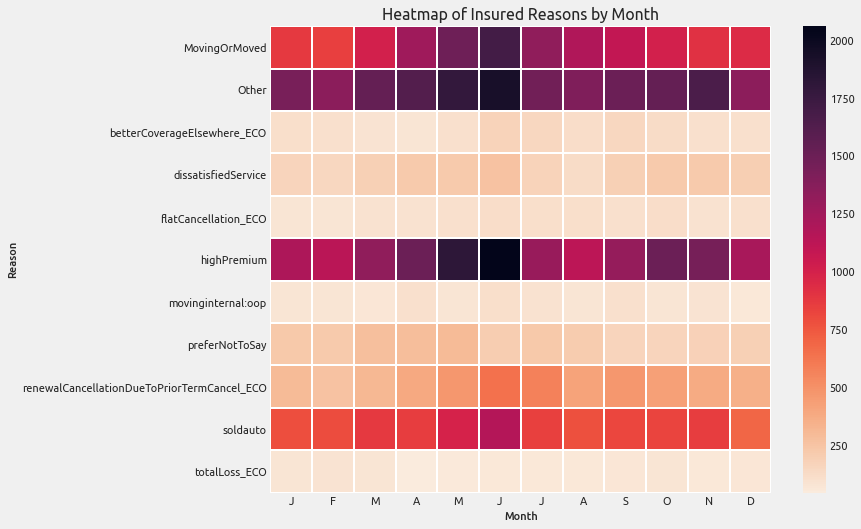

In [362]:
fig, ax = plt.subplots(figsize=(10,8))  
ax = sns.heatmap(pv_insured, cmap='rocket_r', linecolor='white',linewidths=1, xticklabels=["J","F","M","A","M","J","J","A","S","O","N","D"])
ax.set_title('Heatmap of Insured Reasons by Month')
ax.set_ylabel('Reason');  
ax.set_xlabel('Month');  
sns.set_context('talk')

In [236]:
sonnet_insured['Dummy'] = 1

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
sonnet_insured

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled,month,month_name,Dummy
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01,5,May,1
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13,6,Jun,1
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01,5,May,1
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02,5,May,1
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020,2020-05-02,5,May,1
...,...,...,...,...,...,...,...,...,...
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24,1,Jan,1
113790,500099785,HomeownersLine_HOE,Other,insured,1/23/2020,2020-01-23,1,Jan,1
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23,1,Jan,1
113792,500175559,PersonalAutoLine,soldauto,insured,1/23/2020,2020-01-23,1,Jan,1


In [363]:
sonnet_insured_home

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020
5,500083564,HomeownersLine_HOE,renewalCancellationDueToPriorTermCancel_ECO,insured,5/3/2020
9,500296774,HomeownersLine_HOE,flatCancellation_ECO,insured,5/1/2020
10,500163091,HomeownersLine_HOE,MovingOrMoved,insured,5/1/2020
12,500321980,HomeownersLine_HOE,MovingOrMoved,insured,5/1/2020
...,...,...,...,...,...
113778,500006253,HomeownersLine_HOE,highPremium,insured,1/24/2020
113783,500011922,HomeownersLine_HOE,highPremium,insured,1/24/2020
113784,500059693,HomeownersLine_HOE,MovingOrMoved,insured,1/24/2020
113790,500099785,HomeownersLine_HOE,Other,insured,1/23/2020


In [366]:
sonnet_insured_home['date_cancelled'] = pd.to_datetime(sonnet_insured_home['ppd_cancelled_date_string'].str.strip(), format='%m/%d/%Y')

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [367]:
sonnet_insured_home

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled
4,500345628,HomeownersLine_HOE,Other,insured,5/2/2020,2020-05-02
5,500083564,HomeownersLine_HOE,renewalCancellationDueToPriorTermCancel_ECO,insured,5/3/2020,2020-05-03
9,500296774,HomeownersLine_HOE,flatCancellation_ECO,insured,5/1/2020,2020-05-01
10,500163091,HomeownersLine_HOE,MovingOrMoved,insured,5/1/2020,2020-05-01
12,500321980,HomeownersLine_HOE,MovingOrMoved,insured,5/1/2020,2020-05-01
...,...,...,...,...,...,...
113778,500006253,HomeownersLine_HOE,highPremium,insured,1/24/2020,2020-01-24
113783,500011922,HomeownersLine_HOE,highPremium,insured,1/24/2020,2020-01-24
113784,500059693,HomeownersLine_HOE,MovingOrMoved,insured,1/24/2020,2020-01-24
113790,500099785,HomeownersLine_HOE,Other,insured,1/23/2020,2020-01-23


In [370]:
sonnet_insured_auto['date_cancelled'] = pd.to_datetime(sonnet_insured_auto['ppd_cancelled_date_string'].str.strip(), format='%m/%d/%Y')

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [371]:
sonnet_insured_auto

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02
6,500358881,PersonalAutoLine,highPremium,insured,6/12/2020,2020-06-12
...,...,...,...,...,...,...
113787,500199471,PersonalAutoLine,highPremium,insured,1/24/2020,2020-01-24
113788,500507813,PersonalAutoLine,highPremium,insured,1/23/2020,2020-01-23
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23


In [375]:
month_auto = sonnet_insured_auto.resample('M', on='date_cancelled').count()


In [377]:
sonnet_insured_auto

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02
6,500358881,PersonalAutoLine,highPremium,insured,6/12/2020,2020-06-12
...,...,...,...,...,...,...
113787,500199471,PersonalAutoLine,highPremium,insured,1/24/2020,2020-01-24
113788,500507813,PersonalAutoLine,highPremium,insured,1/23/2020,2020-01-23
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23


In [382]:
sonnet_insured_auto[['pj_cancellation_reason', 'count']].groupby(pd.Grouper(key='date_cancelled', freq='1M')).sum().sort_values(by='date_cancelled', ascending=True)


KeyError: "['count'] not in index"

In [384]:
sonnet_insured_auto['val'] = 1

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [385]:
sonnet_insured_auto['val'].resample('M', how='sum')

TypeError: resample() got an unexpected keyword argument 'how'

In [386]:
sonnet_insured_auto

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled,val
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01,1
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13,1
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01,1
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02,1
6,500358881,PersonalAutoLine,highPremium,insured,6/12/2020,2020-06-12,1
...,...,...,...,...,...,...,...
113787,500199471,PersonalAutoLine,highPremium,insured,1/24/2020,2020-01-24,1
113788,500507813,PersonalAutoLine,highPremium,insured,1/23/2020,2020-01-23,1
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24,1
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23,1


KeyboardInterrupt: 

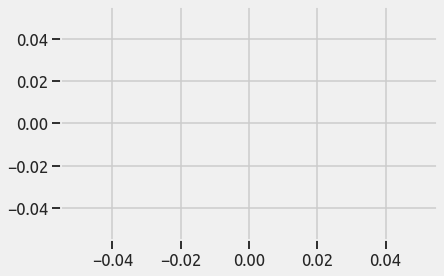

In [388]:
sns.lineplot(data=sonnet_insured_auto, x="date_cancelled", y="val")

In [390]:
auto_pv = sonnet_insured_auto.pivot( "pj_cancellation_reason", "date_cancelled", "val")

ValueError: Index contains duplicate entries, cannot reshape

KeyboardInterrupt: 

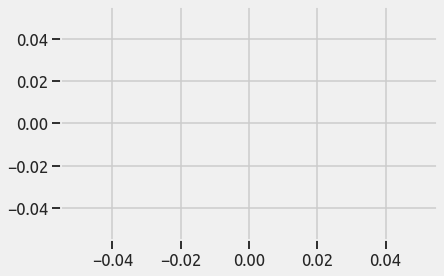

In [393]:
sns.lineplot(data=sonnet_insured_auto, x="date_cancelled", y="val")

In [396]:
sonnet_insured_auto['date_cancelled'].min()

Timestamp('2016-08-28 00:00:00')

In [401]:
from datetime import datetime
now = datetime.now() 

year = now.strftime("%Y")

In [402]:
year

'2020'

In [405]:
sonnet_insured_auto['new_date'] = sonnet_insured_auto['date_cancelled'].dt.strftime("%Y%m")

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [406]:
sonnet_insured_auto

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled,val,new_date
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01,1,202005
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13,1,202006
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01,1,202005
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02,1,202005
6,500358881,PersonalAutoLine,highPremium,insured,6/12/2020,2020-06-12,1,202006
...,...,...,...,...,...,...,...,...
113787,500199471,PersonalAutoLine,highPremium,insured,1/24/2020,2020-01-24,1,202001
113788,500507813,PersonalAutoLine,highPremium,insured,1/23/2020,2020-01-23,1,202001
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24,1,202001
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23,1,202001


In [407]:
sonnet_insured_home['new_date'] = sonnet_insured_home['date_cancelled'].dt.strftime("%Y%m")

/home/alexei/ds/eme/pro/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [408]:
sonnet_insured_auto

,ppd_policy_number,ppd_policy_line_type,pj_cancellation_reason,pj_cancellation_source,ppd_cancelled_date_string,date_cancelled,val,new_date
0,500275086,PersonalAutoLine,MovingOrMoved,insured,5/1/2020,2020-05-01,1,202005
1,500574498,PersonalAutoLine,highPremium,insured,6/13/2020,2020-06-13,1,202006
2,500107069,PersonalAutoLine,Other,insured,5/1/2020,2020-05-01,1,202005
3,500191231,PersonalAutoLine,highPremium,insured,5/2/2020,2020-05-02,1,202005
6,500358881,PersonalAutoLine,highPremium,insured,6/12/2020,2020-06-12,1,202006
...,...,...,...,...,...,...,...,...
113787,500199471,PersonalAutoLine,highPremium,insured,1/24/2020,2020-01-24,1,202001
113788,500507813,PersonalAutoLine,highPremium,insured,1/23/2020,2020-01-23,1,202001
113789,500017966,PersonalAutoLine,Other,insured,1/24/2020,2020-01-24,1,202001
113791,500274355,PersonalAutoLine,Other,insured,1/23/2020,2020-01-23,1,202001


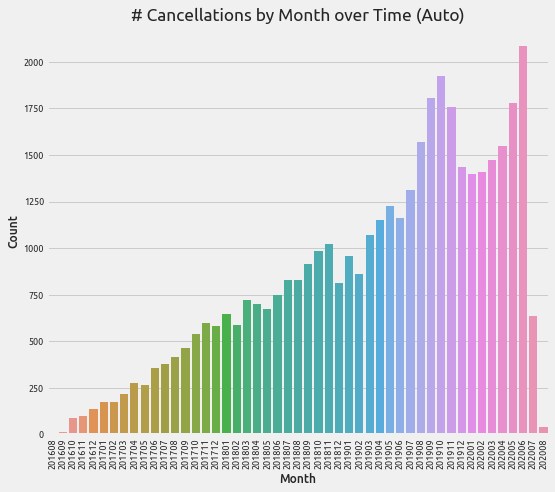

In [433]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(data=sonnet_insured_auto, x="new_date")
ax.set_title('# Cancellations by Month over Time (Auto)')
ax.set_ylabel('Count');
ax.set_xlabel('Month')
sns.set_context('talk')


sns.countplot(data=sonnet_insured_auto, x="new_date")
ax.set_ylabel('Count');
ax.set_xlabel('Month')
plt.xticks(rotation=90)

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# g = sns.FacetGrid(sonnet, col="pj_cancellation_source", row='ppd_policy_line_type')
# g = g.map(plt.hist, "pj_cancellation_reason");
# g.set_xticklabels(rotation=90)

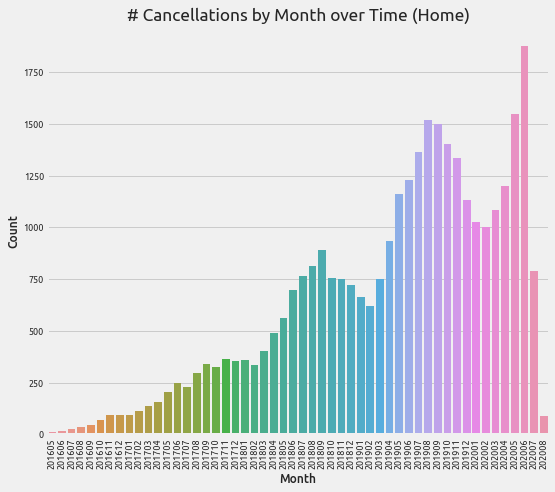

In [434]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(data=sonnet_insured_home, x="new_date")
ax.set_title('# Cancellations by Month over Time (Home)')
ax.set_ylabel('Count');
ax.set_xlabel('Month')
sns.set_context('talk')



ax.set_ylabel('Count');
ax.set_xlabel('Month')
plt.xticks(rotation=90)

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# g = sns.FacetGrid(sonnet, col="pj_cancellation_source", row='ppd_policy_line_type')
# g = g.map(plt.hist, "pj_cancellation_reason");
# g.set_xticklabels(rotation=90)